In [1]:
import numpy as np
import pandas as pd

In [4]:
%%time
df = pd.read_csv('./dataset/AAPL.csv')
df

Wall time: 29.2 ms


,Date,Open,High,Low,Close,Adj Close,Volume
0,1984-02-01,0.110491,0.113839,0.109375,0.109933,0.086583,163116800
1,1984-02-02,0.109933,0.111607,0.107701,0.111049,0.087462,134915200
2,1984-02-03,0.111049,0.113839,0.109375,0.109375,0.086143,145488000
3,1984-02-06,0.109375,0.109375,0.103237,0.103795,0.081748,165558400
4,1984-02-07,0.103795,0.108259,0.099888,0.107701,0.084825,217728000
...,...,...,...,...,...,...,...
9312,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
9313,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100
9314,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
9315,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800


In [7]:
# appl의 종가 데이터를 뽑아온다.
priceDF = df['Close']
priceDF

0         0.109933
1         0.111049
2         0.109375
3         0.103795
4         0.107701
           ...    
9312    128.979996
9313    128.800003
9314    130.889999
9315    128.910004
9316    127.139999
Name: Close, Length: 9317, dtype: float64

### 단순 이동평균(moving average) 구하기
단순 이동평균을 구하기 위해 pandas의 rolling 함수를 이용합니다. rolling 함수의 변수로 window 프레임의 크기를
전달합니다. n일의 이동평균을 구하고 싶은 경우 n을 전달합니다. 그 이후 mean()함수를 호출해 프레임의 평균을 구합니다.

### pandas rolling function
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)<br>
위의 형태로 argument를 입력 받습니다. 기본적으로 인자 하나를 넣어주는 경우 window를 초기화하는 것입니다.<br>
window argument는 정수, 오프셋 또는 BaseIndexer 서브 클래스 유형 매개변수입니다. 창의 크기를 지정하고, 이 매개변수를 이용하여 통계 계산에 사용하는 관측치의 수를 지정합니다. (sliding window의 size를 정해주는 것 같다.)

In [8]:
mov_avg5 = priceDF.rolling(5).mean()
mov_avg20 = priceDF.rolling(20).mean()

In [11]:
mov_avg5

0              NaN
1              NaN
2              NaN
3              NaN
4         0.108371
           ...    
9312    129.911998
9313    129.470000
9314    130.328000
9315    129.926001
9316    128.944000
Name: Close, Length: 9317, dtype: float64

### 선형 가중 이동평균 구하기
pandas에서 선형 가중 이동평균을 구하기 위한 함수는 따로 존재하지 않습니다. 따라서, rolling에서 사용할 수 있는 함수를 정의해야 하는데, 이는 다음과 같이 정의할 수 있습니다.

In [12]:
def weightMean(weightArray):
    def inner(x):
        return (weightArray * x).mean()
    return inner

다음으로는 연산에 쓰일 가중치 배열을 정의합니다. <br>
[1, 2, 3, 4, 5]의 리스트를 다음과 같은 방법으로 생성한 후 rolling 함수를 수행하고, apply 함수를 weightMean 함수를 호출하여 수행합니다.

In [17]:
n = 5
# [1, 2 ,3, 4, 5]의 list를 생성
t = [v for v in np.arange(1, n + 1)]
print(t)

sumv = sum(t) / n
print(sumv)
wts = np.array(t) / sumv
print(wts)
wMov5 = priceDF.rolling(n).apply(weightMean(wts), raw=True)

[1, 2, 3, 4, 5]
3.0
[0.33333333 0.66666667 1.         1.33333333 1.66666667]


In [18]:
n = 20
# [1, ~ 20]의 list를 생성
t = [v for v in np.arange(1, n + 1)]
print(t)

sumv = sum(t) / n
print(sumv)
wts = np.array(t) / sumv
print(wts)
wMov20 = priceDF.rolling(n).apply(weightMean(wts), raw=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
10.5
[0.0952381  0.19047619 0.28571429 0.38095238 0.47619048 0.57142857
 0.66666667 0.76190476 0.85714286 0.95238095 1.04761905 1.14285714
 1.23809524 1.33333333 1.42857143 1.52380952 1.61904762 1.71428571
 1.80952381 1.9047619 ]


### 지수 이동평균 구하기
지수 이동평균을 구하기 위해서 pandas의 ewm 함수를 호출합니다. 이 함수는 rolling 함수와 사용이 유사합니다. 5일 간의 지수 이동 평균을 구하기 위해서는 ewm의 span 인자에 5를 넣으면 됩니다.

In [20]:
eMov5 = priceDF.ewm(span=5).mean()
eMov20 = priceDF.ewm(span=20).mean()

In [21]:
eMov5

0         0.109933
1         0.110603
2         0.110021
3         0.107435
4         0.107537
           ...    
9312    130.234388
9313    129.756260
9314    130.134173
9315    129.726117
9316    128.864077
Name: Close, Length: 9317, dtype: float64

### 이동 평균들 비교
윈도우 프레임을 5로 설정한 이동평균들을 비교합니다.

Text(0.5, 1.0, 'Comparison between simple, weighted, and exponentional moving averages')

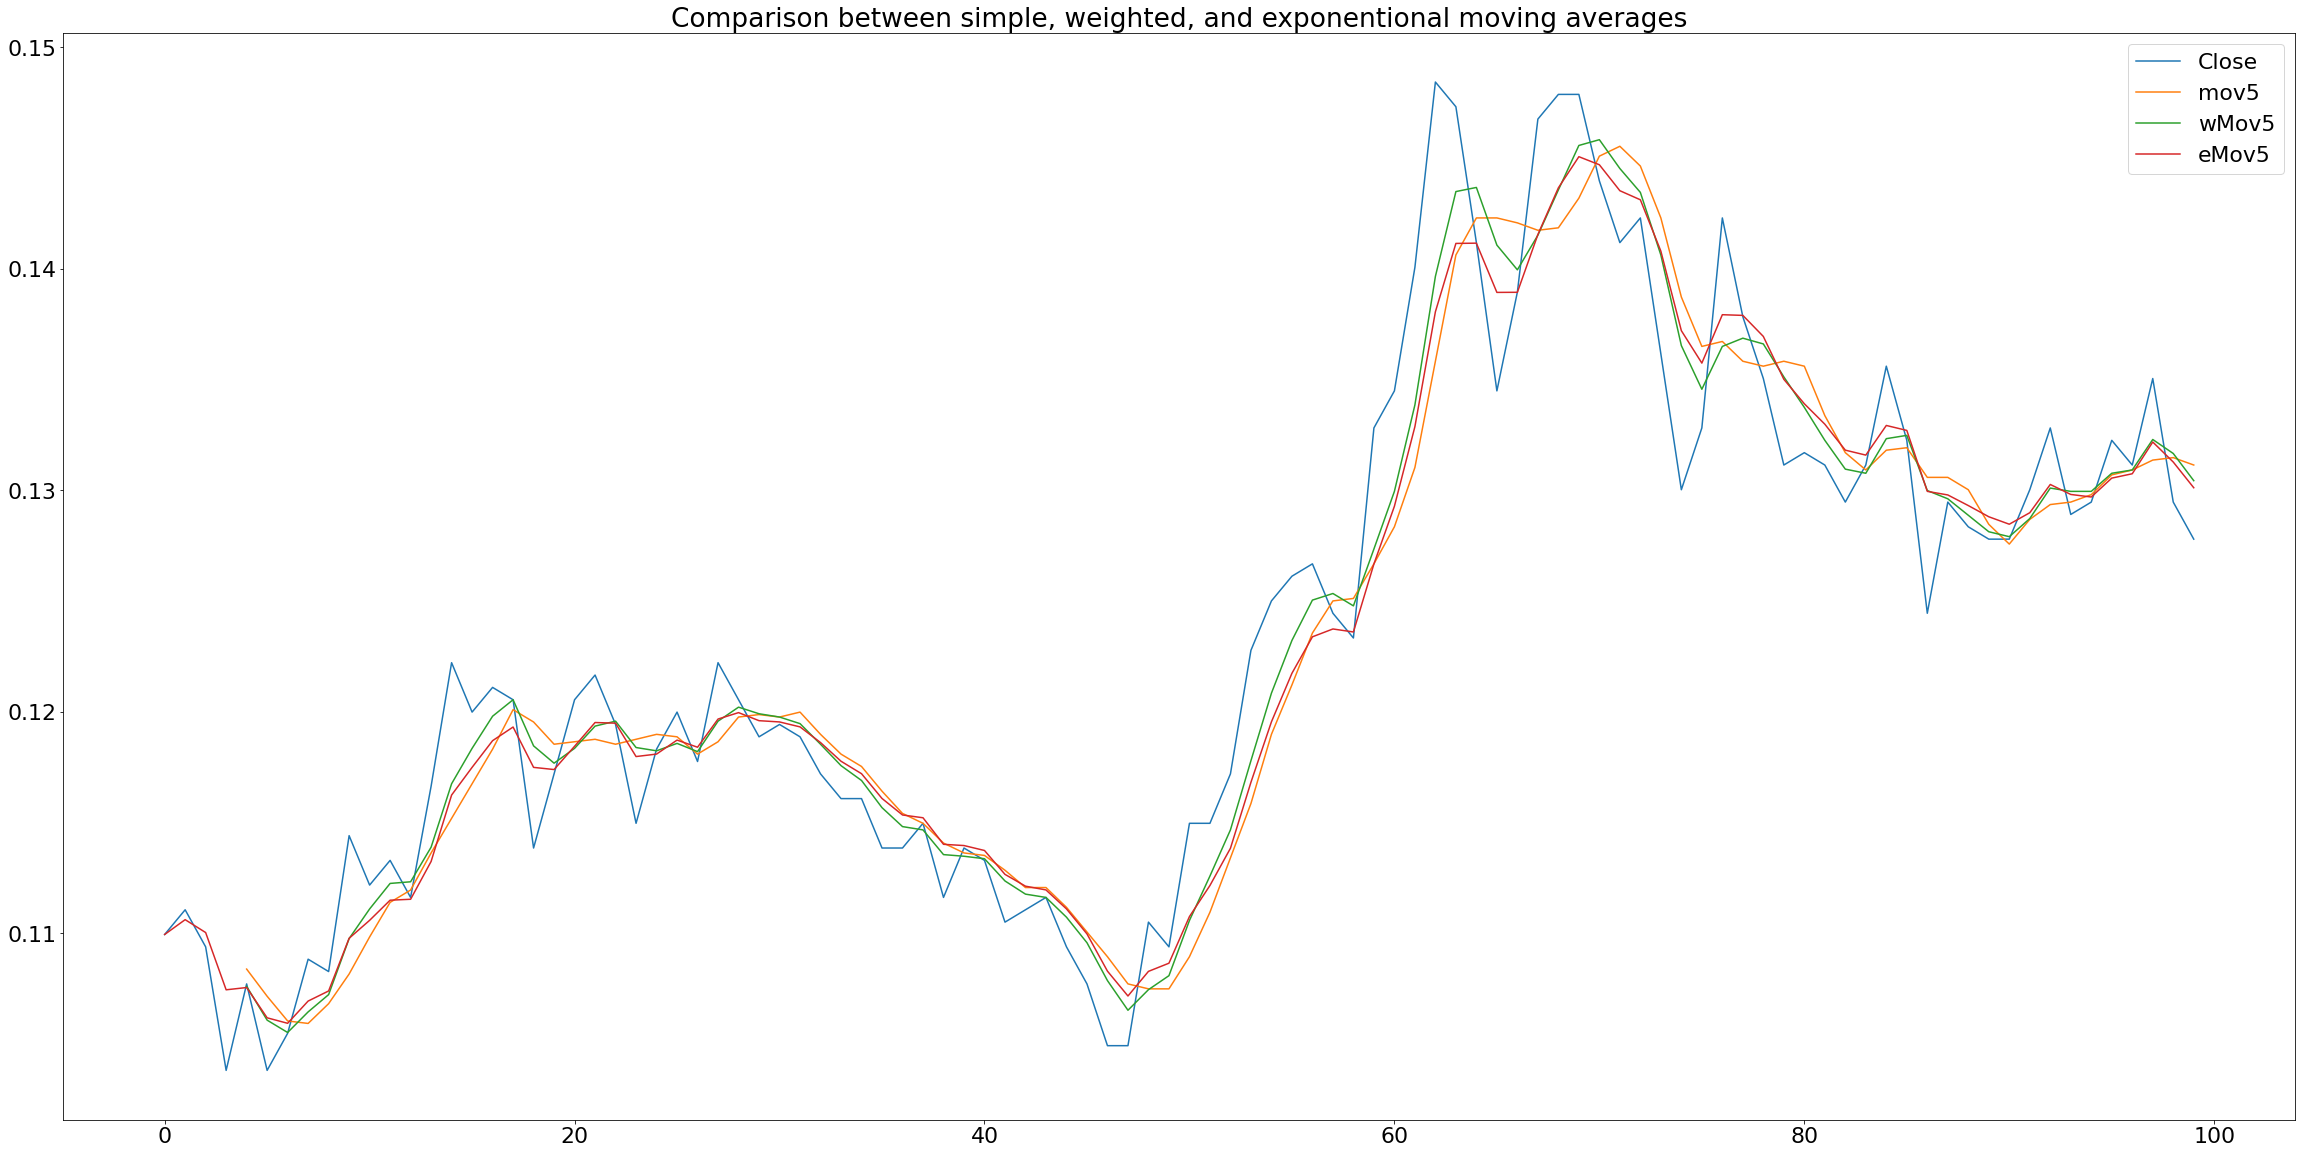

In [27]:
import matplotlib.pyplot as plt
start = 0
end = 100

rindex = pd.RangeIndex(start=start, stop=end)
fig, ax1 = plt.subplots(figsize=[40,20])
plt.rcParams.update({'font.size' :22})

ax1.plot(rindex, df['Close'].iloc[start:end], label='Close')
ax1.plot(rindex, mov_avg5.iloc[start:end], label='mov5')
ax1.plot(rindex, wMov5.iloc[start:end], label='wMov5')
ax1.plot(rindex, eMov5.iloc[start:end], label='eMov5')

plt.legend()
plt.title('Comparison between simple, weighted, and exponentional moving averages')

Text(0.5, 1.0, 'Comparison between simple, weighted, and exponentional moving averages')

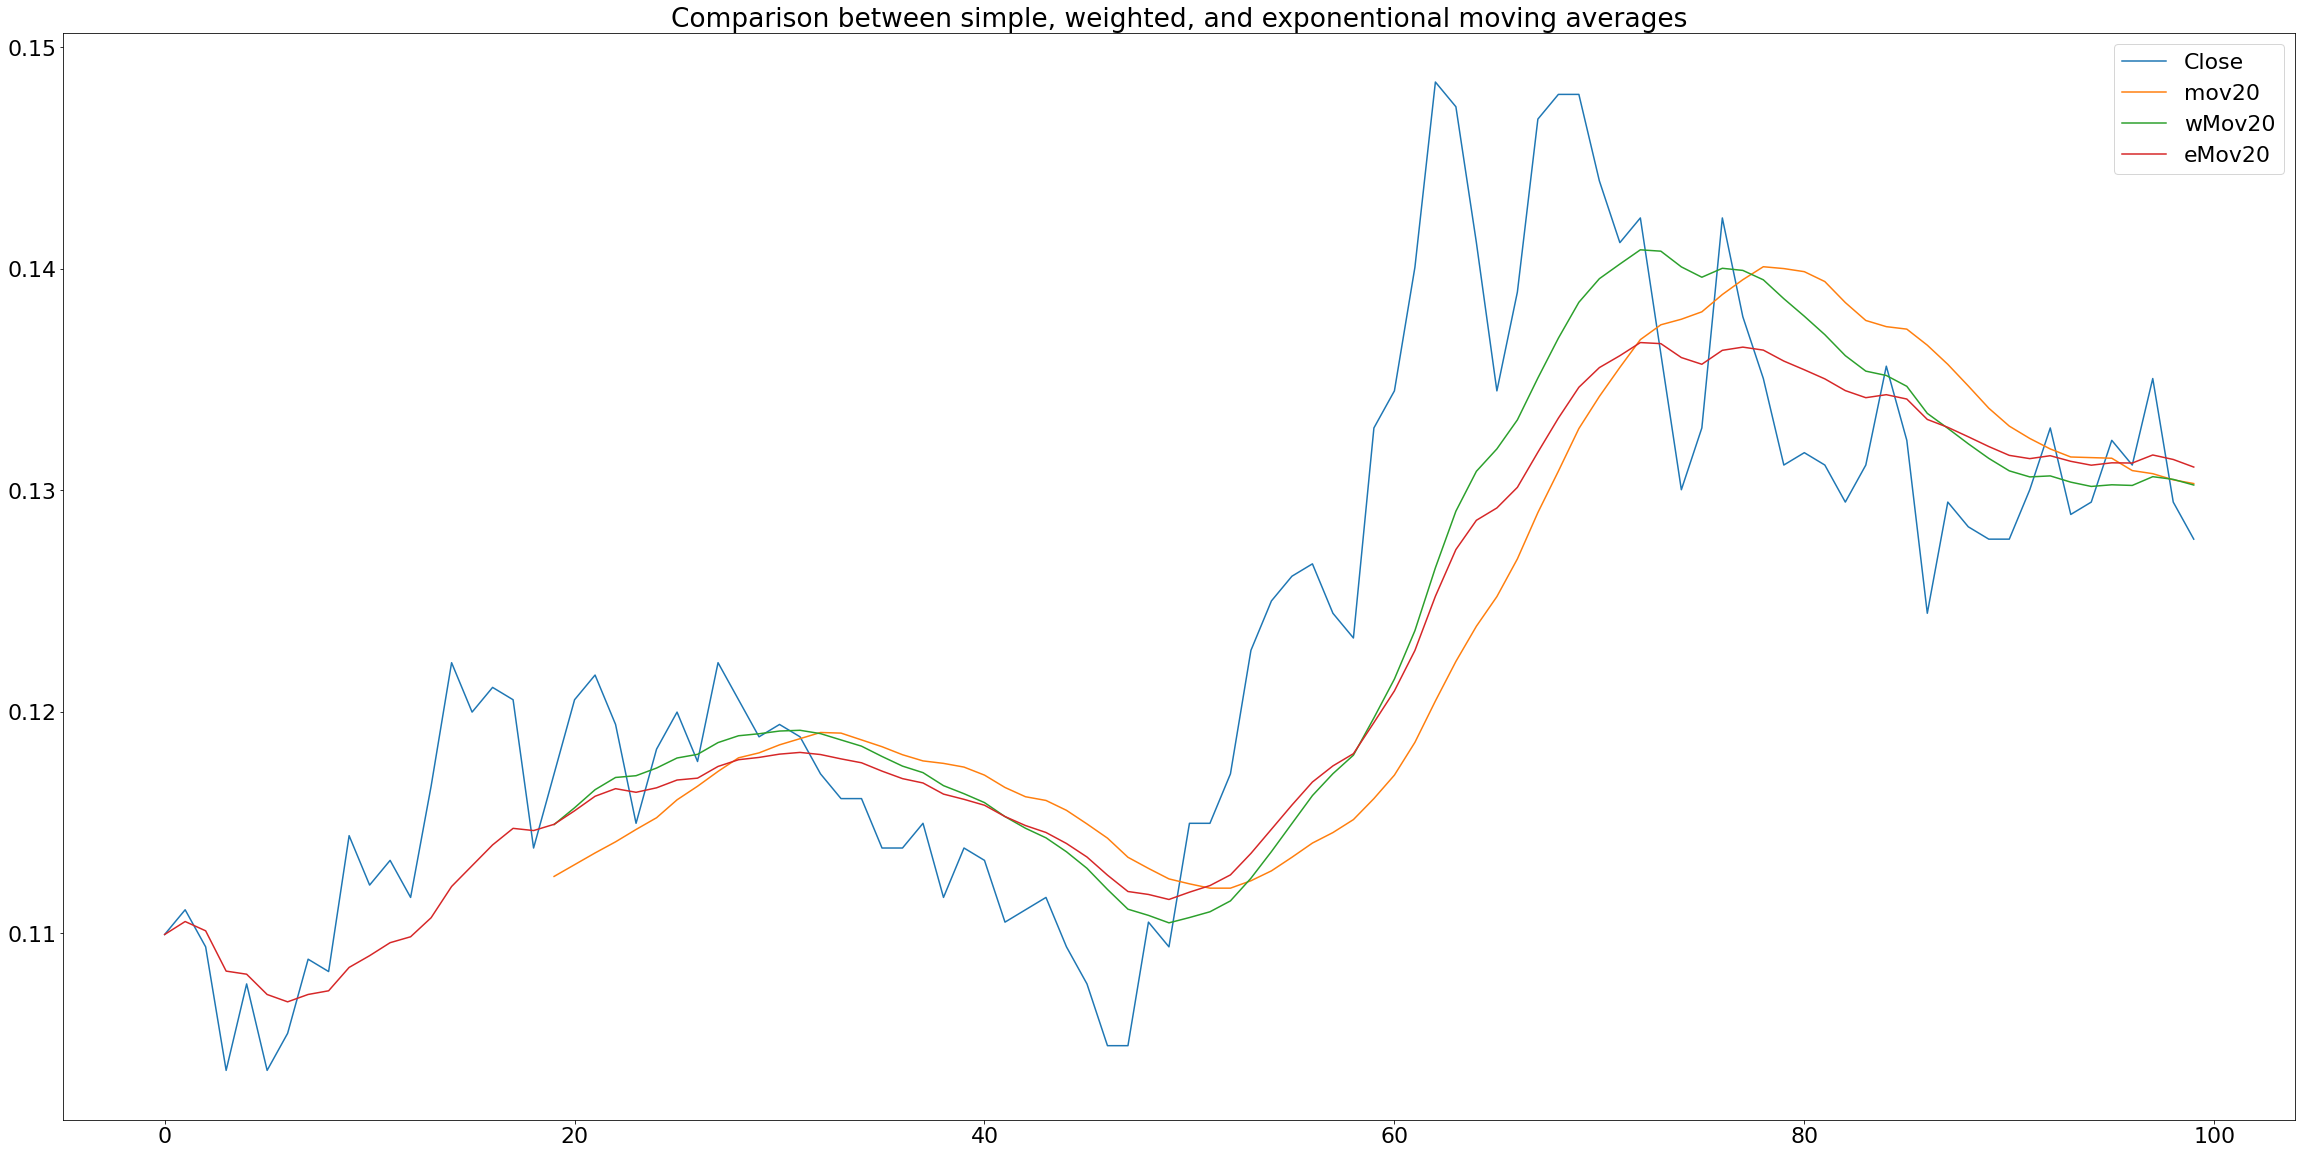

In [28]:
start = 0
end = 100

rindex = pd.RangeIndex(start=start, stop=end)
fig, ax1 = plt.subplots(figsize=[40,20])
plt.rcParams.update({'font.size' : 22})

ax1.plot(rindex, df['Close'].iloc[start:end], label='Close')
ax1.plot(rindex, mov_avg20.iloc[start:end], label='mov20')
ax1.plot(rindex, wMov20.iloc[start:end], label='wMov20')
ax1.plot(rindex, eMov20.iloc[start:end], label='eMov20')

plt.legend()
plt.title('Comparison between simple, weighted, and exponentional moving averages')

위와 같이 단순 이동평균선, 선형 가중 이동평균선, 지수 이동평균선 중 어느 것이 좋고 나쁨을 이야기할 정도로 큰 차이가 있지 않음을 확인할 수 있었습니다. 위의 이동평균선들을 상황에 맞게 사용하는 것이 중요할 것 같습니다.

- reference
    - moving average with pandas : https://www.openaitrading.com/python-pandas-%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0-%EA%B5%AC%ED%95%98%EA%B8%B0/ 
    - rolling function : https://www.delftstack.com/ko/api/python-pandas/pandas-dataframe-dataframe.rolling-function/